# CM2604 - Coursework 

Done by Ethan Christoff Perera - `RGU`: 2331419, `IIT`: 20221812

In [2]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df_2 = pd.read_csv('bank+marketing/bank/bank.csv')
df_3 = pd.read_csv('bank+marketing/bank-additional/bank-additional/bank-additional-full.csv')
df_4 = pd.read_csv('bank+marketing/bank-additional/bank-additional/bank-additional.csv')

In [38]:
# initializing datasets

bank_full = pd.read_csv('bank+marketing/bank/bank-full.csv', delimiter=';')

In [39]:
# Prints out all the values in a tabular format

bank_full.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [40]:
# Prints out the number of entries, columns and rows

bank_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [41]:
# Prints out the number of rows and columns

bank_full.shape

(45211, 17)

In [42]:
# Lists out each individual row 

bank_full.describe

<bound method NDFrame.describe of        age           job   marital  education default  balance housing loan  \
0       58    management   married   tertiary      no     2143     yes   no   
1       44    technician    single  secondary      no       29     yes   no   
2       33  entrepreneur   married  secondary      no        2     yes  yes   
3       47   blue-collar   married    unknown      no     1506     yes   no   
4       33       unknown    single    unknown      no        1      no   no   
...    ...           ...       ...        ...     ...      ...     ...  ...   
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact 

# 1.0 Exploratory Data Analysis

>In order to minimze the data set we must first understand its key and core components such that it may be pruned and shortened, the following >steps are to be adhered:

- 1.1 Find Unwanted Columns (the current dataset may negate this due to their being no unwanted columnts)
- 1.2 Find Missing Values
- 1.3 Find Features with one value
- 1.4 Explore the Categorical Features
- 1.5 Find Categorical Feature Distribution
- 1.6 Relationship between Categorical Features and Label
- 1.7 Explore the Numerical Features
- 1.8 Find Discrete Numerical Features
- 1.9 Relation between Discrete numerical Features and Labels
- 1.10 Find Continous Numerical Features
- 1.11 Distribution of Continous Numerical Features
- 1.12 Relation between Continous numerical Features and Labels
- 1.13 Find Outliers in numerical features
- 1.14 Explore the Correlation between numerical features
- 1.15 Find Pair Plot
- 1.16 Check the Data set is balanced or not based on target values in classification

#### 1.2 Finding any missing values

In [43]:
# find missing values
features_na = [features for features in bank_full.columns if bank_full[features].isnull().sum() > 0]
for feature in features_na:
    print(feature, np.round(bank_full[feature].isnull().mean(), 4),  ' % missing values')
else:
    print("No missing value found")

No missing value found


#### 1.3 Finding Features with only one value

The following snippet lists out all the unique values for each feature and looks for any that has a single attribute (which is none)

In [44]:
for column in bank_full.columns:
    print(column, bank_full[column].nunique()," | ", "has over 1 value" if bank_full[column].nunique() == 10 else "has more than one value")

age 77  |  has more than one value
job 12  |  has more than one value
marital 3  |  has more than one value
education 4  |  has more than one value
default 2  |  has more than one value
balance 7168  |  has more than one value
housing 2  |  has more than one value
loan 2  |  has more than one value
contact 3  |  has more than one value
day 31  |  has more than one value
month 12  |  has more than one value
duration 1573  |  has more than one value
campaign 48  |  has more than one value
pdays 559  |  has more than one value
previous 41  |  has more than one value
poutcome 4  |  has more than one value
y 2  |  has more than one value


#### 1.4 Explore the categorical features

Basically finding all the none-numeric (continuouus) features that may be utilized for classifications (e.g. logistic regression algorithms)

In [62]:
categorical_features = [feature for feature in bank_full.columns if bank_full[feature].dtype != 'int64' and feature != 'y']

for i in categorical_features:
    print(f"The feature is '{i}' whereas the number of values for the feature is: {len(bank_full[i].unique())}")
print(f"There are {len(categorical_features)} categorical features")

The feature is 'job' whereas the number of values for the feature is: 12
The feature is 'marital' whereas the number of values for the feature is: 3
The feature is 'education' whereas the number of values for the feature is: 4
The feature is 'default' whereas the number of values for the feature is: 2
The feature is 'housing' whereas the number of values for the feature is: 2
The feature is 'loan' whereas the number of values for the feature is: 2
The feature is 'contact' whereas the number of values for the feature is: 3
The feature is 'month' whereas the number of values for the feature is: 12
The feature is 'poutcome' whereas the number of values for the feature is: 4
There are 9 categorical features


#### 1.5 Find the distribution of categorical features

>This process is carried out in order to understand how the features are distributed amongst the dataset such that we may retain an overview into >the frequency of each categorical feature occuring

Some of the outcomes we may detect from this would include the following:
- Imbalance in data (this may influence the performance of the model, etc)
- Overfitting issues may occur given a skewed distribution 
- Given an imbalanced data set we may merge some columns together in order to minimize the skew of the dataset

Regard the following code to see how the process was implemented:

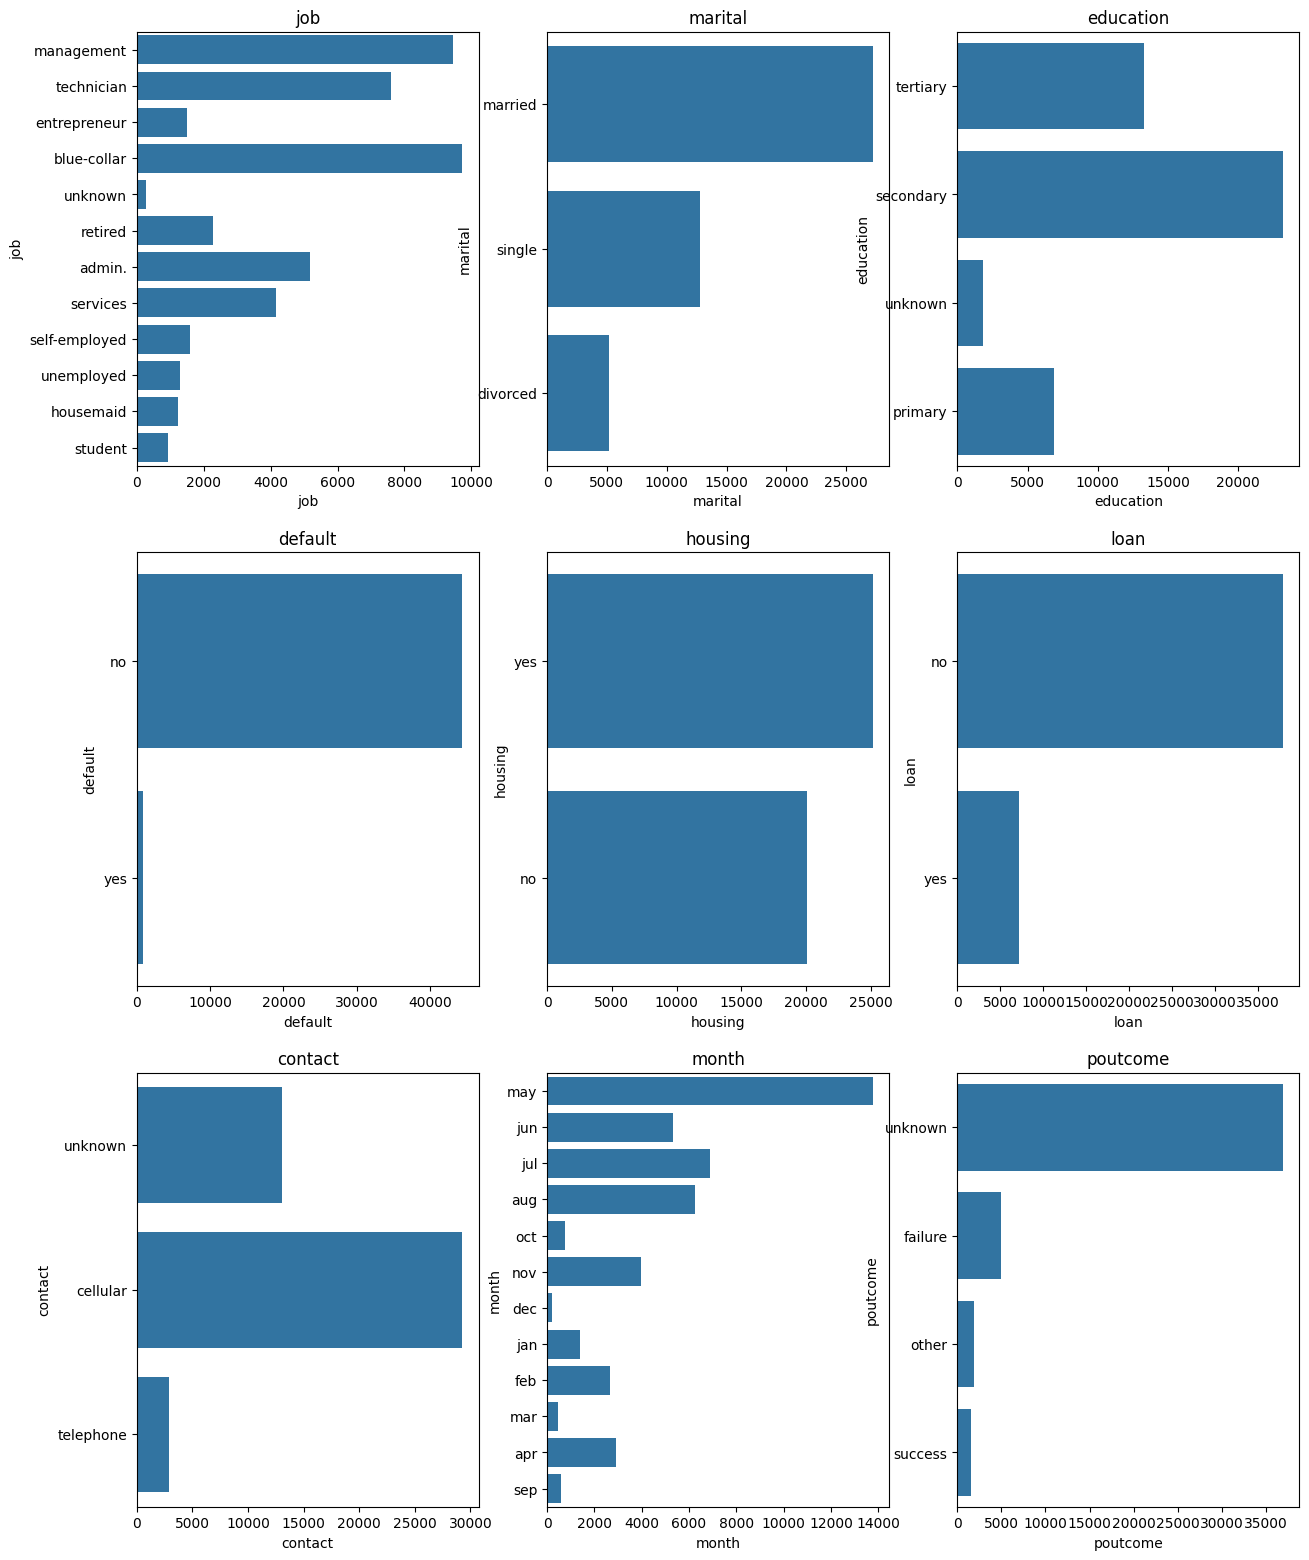

In [58]:
plt.figure(figsize=(15,80), facecolor='white')
plotnumber = 1
for categorical_feature in categorical_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.countplot(y=categorical_feature,data=bank_full)
    plt.xlabel(categorical_feature)
    plt.title(categorical_feature)
    plotnumber+=1
plt.show()

#### 1.5.1 Findings

It was found that:

- "Blue-collar" is the most frequent attribute for job type
- "married" is the most frequent attribute for marital status
- "secondary" is the most frequent attribute for education
- "no" is the most frequent attribute for the default column
- "yes" is the most frequent attribute for housing status
- "no" is the most frequent attribute for loan status
- "cellular" is the most frequent attribute for contact 
- "may" is the most frequent attribute for month
- "unknown" is the most frequent attribute for poutcome


#### 1.6 Relationship between categorical feature and label

The purpose of this step is to develop a relationship between each categorical feature and its target such that a pattern, association, etc may be made

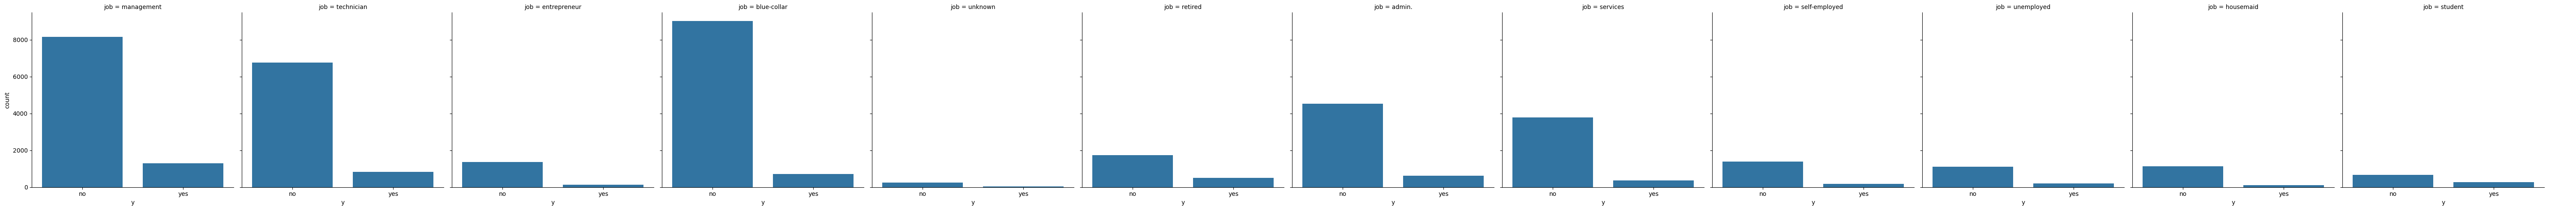

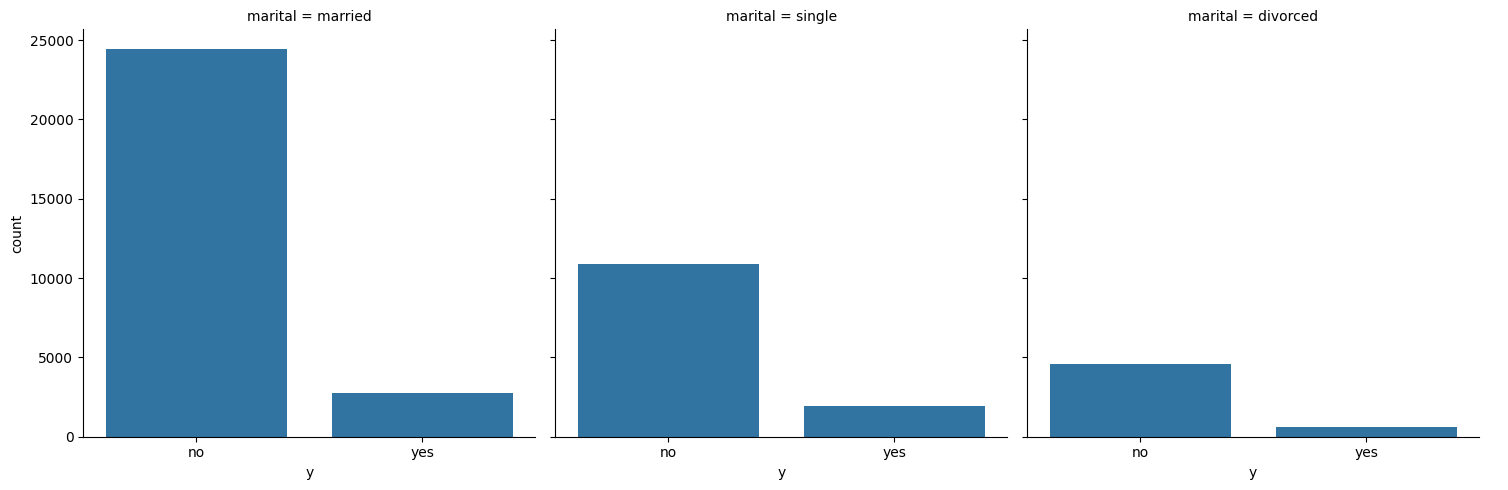

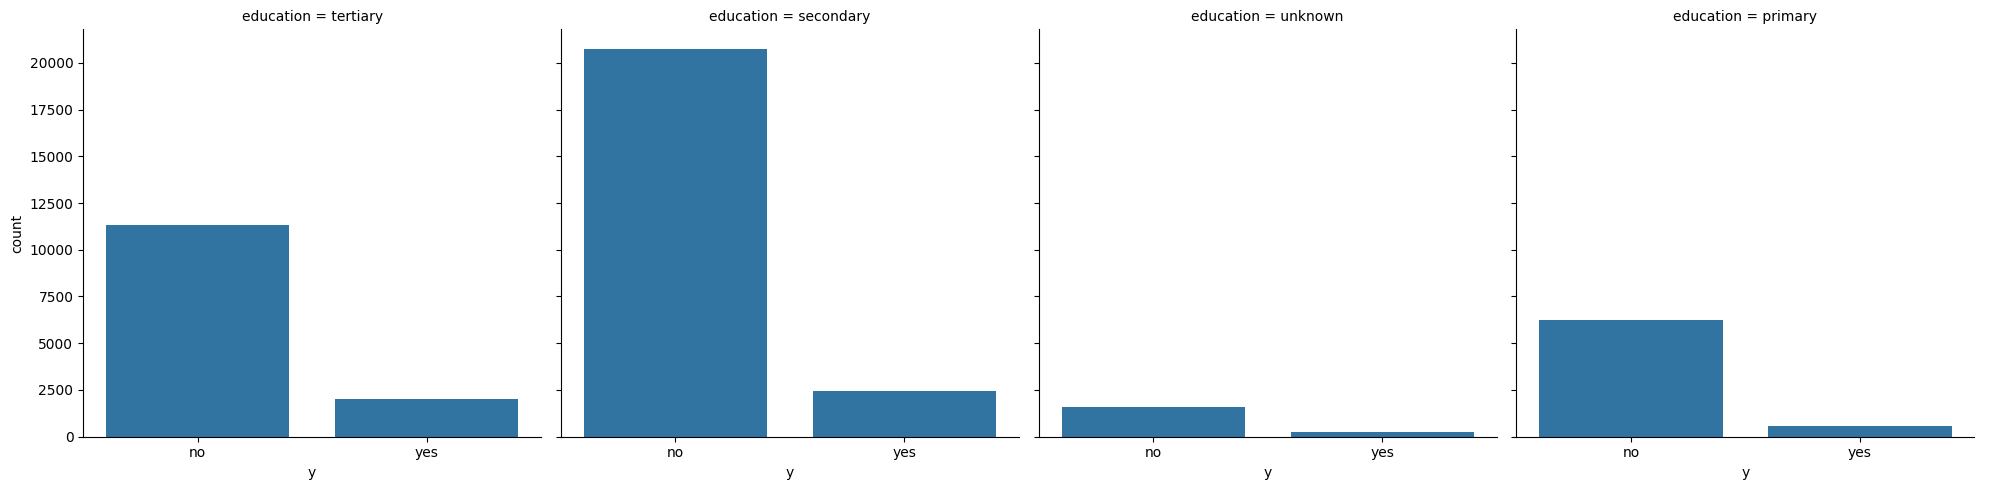

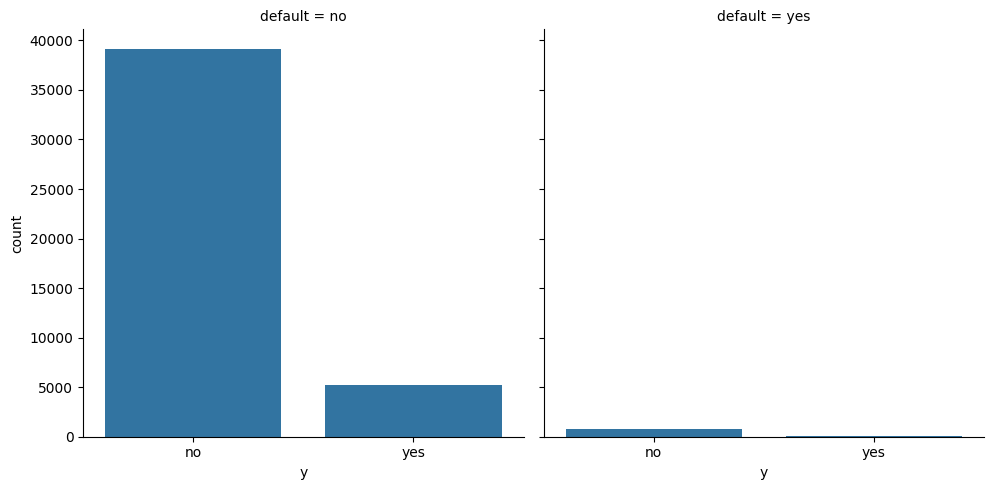

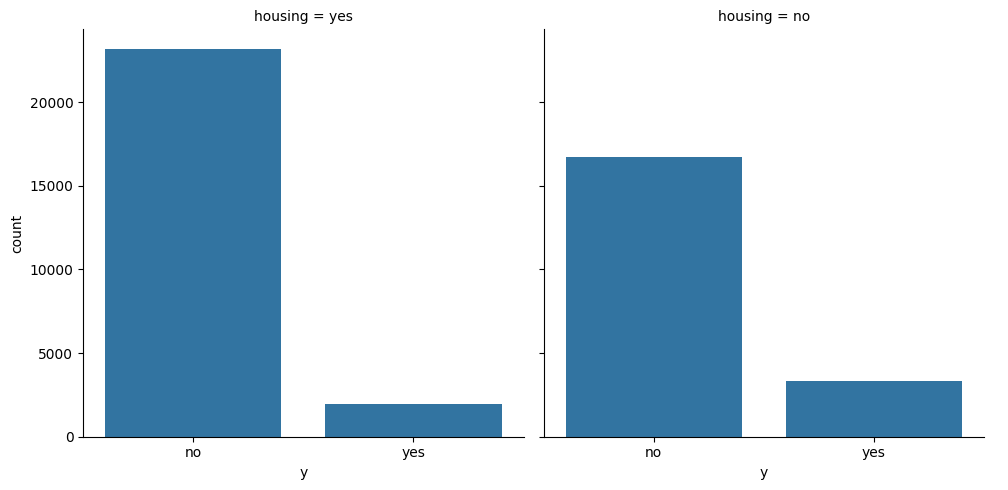

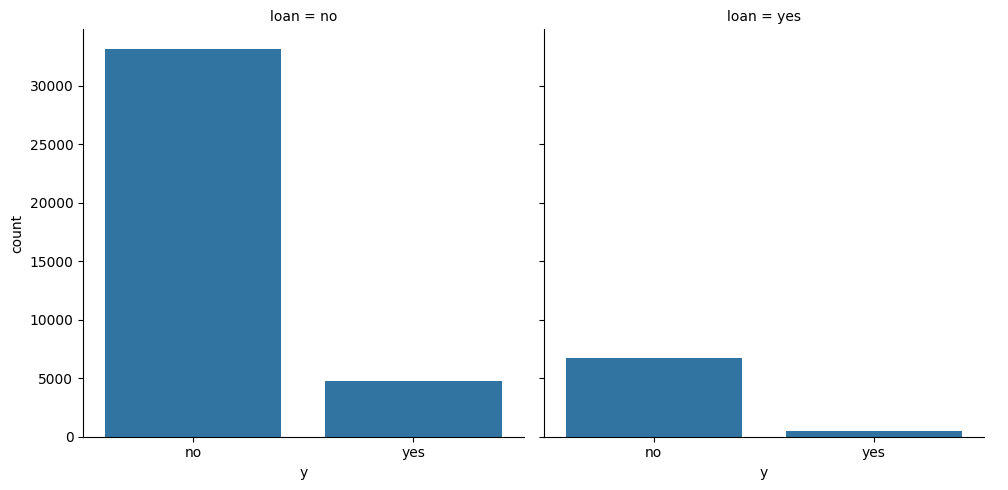

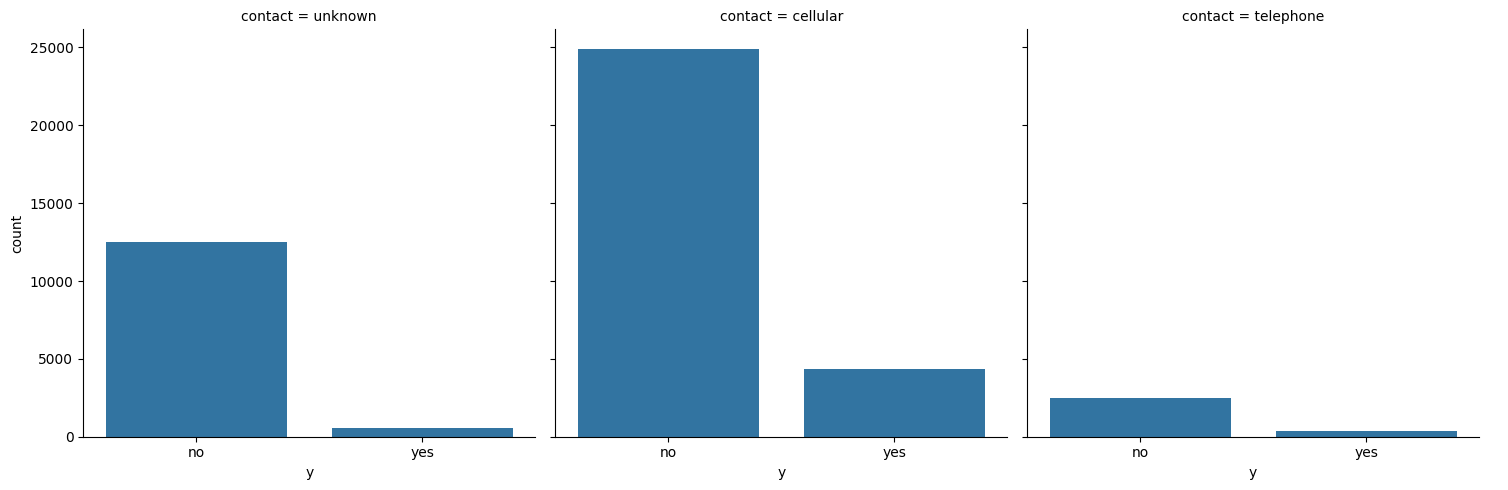

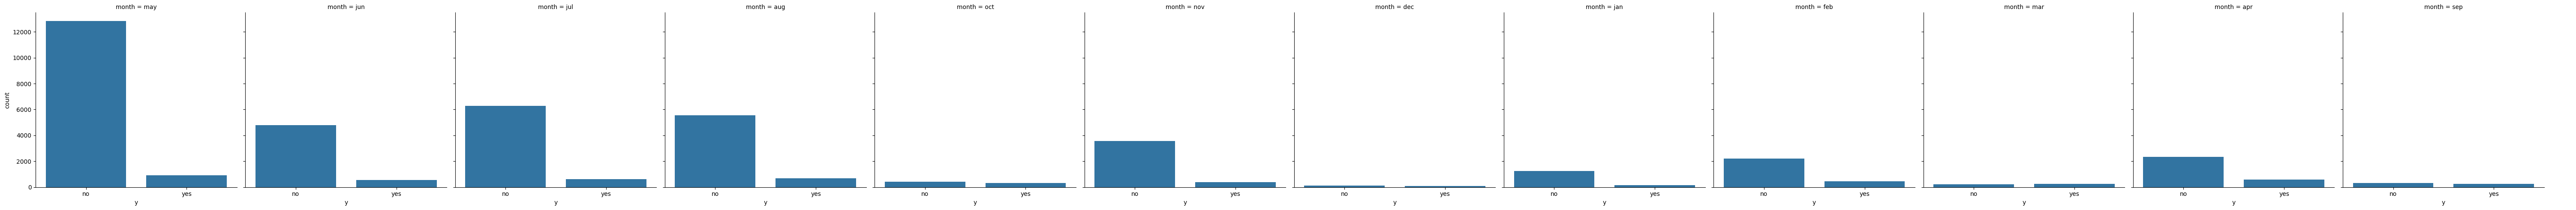

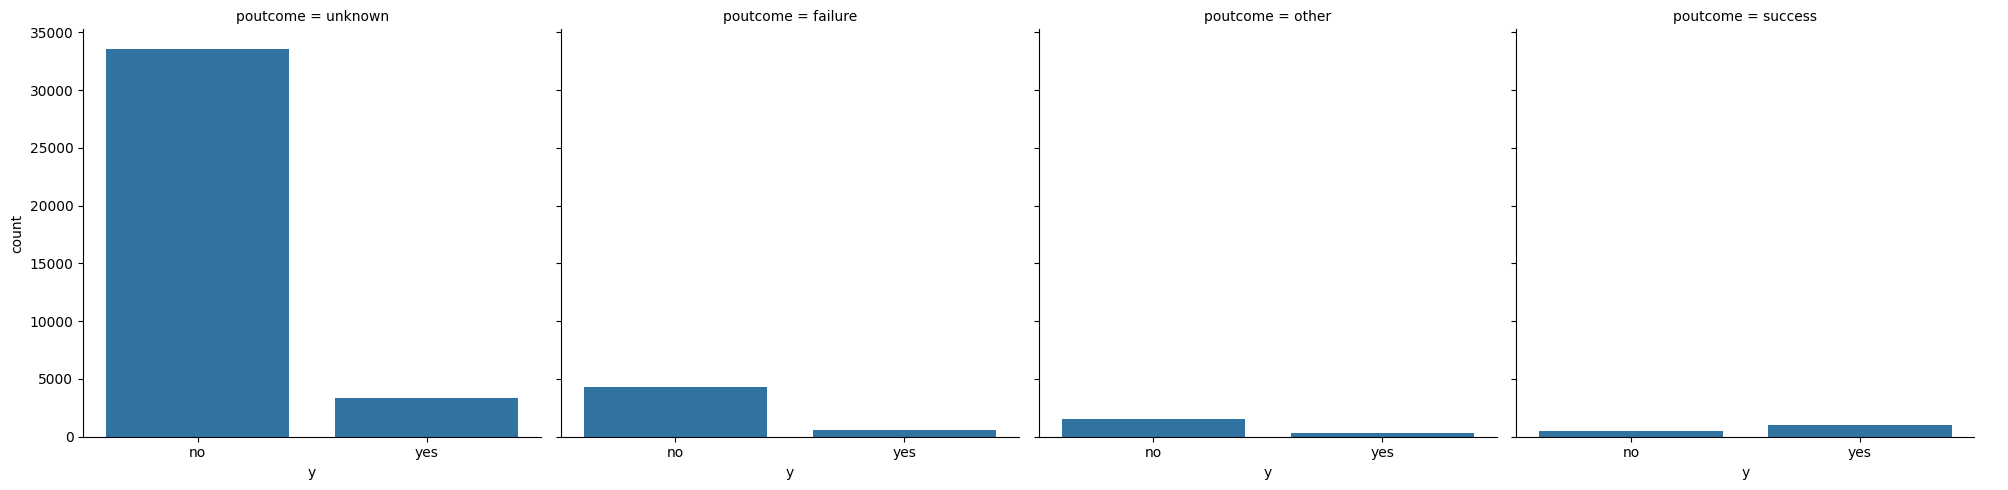

In [59]:
for categorical_feature in categorical_features:
    sns.catplot(x='y', col=categorical_feature, kind='count', data=bank_full)# Y is the target column as it consists of the deposit status
plt.show()

In [60]:
for categorical_feature in categorical_features:
    print(bank_full.groupby(['y',categorical_feature]).size())

y    job          
no   admin.           4540
     blue-collar      9024
     entrepreneur     1364
     housemaid        1131
     management       8157
     retired          1748
     self-employed    1392
     services         3785
     student           669
     technician       6757
     unemployed       1101
     unknown           254
yes  admin.            631
     blue-collar       708
     entrepreneur      123
     housemaid         109
     management       1301
     retired           516
     self-employed     187
     services          369
     student           269
     technician        840
     unemployed        202
     unknown            34
dtype: int64
y    marital 
no   divorced     4585
     married     24459
     single      10878
yes  divorced      622
     married      2755
     single       1912
dtype: int64
y    education
no   primary       6260
     secondary    20752
     tertiary     11305
     unknown       1605
yes  primary        591
     secondary     2

#### 1.6.1 Findings

It may be seen that:
 
- Married persons tend to make the least number of deposits (majority of married persons affect target label with a 'no')
- People with a manegement based job have the highest number of interested individuals in making a deposit
- Persons that have had a secondary education tend to make a few deposits

#### 1.7 Exploring the numerical features

Here we simply go through the continuous variables that consist of numeirc values where the probability of it may be calculated through linear regressions, etc

In [61]:
# Filtering out the object based features such that categorical features are no longer considered
numerical_features = [feature for feature in bank_full.columns if bank_full[feature].dtype != 'object' and feature != 'y']
print(f"Number of numerical values: {len(numerical_features)}")# There are only 7 numeric features

bank_full[numerical_features].head()

Number of numerical values: 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


#### 1.8 Find Discrete Numerical Features

In [65]:
discrete_features = [feature for feature in numerical_features if len(bank_full[feature].unique())<25]
print(f"There are {len(discrete_features)} discrete variables")

There are 0 discrete variables


#### 1.9 Finding the relationship between the discrete features and label

As there are no discrete features, this may be excluded

#### 1.10 Finding Continuous Numerical Features

In [66]:
continous_features = [feature for feature in numerical_features if feature not in discrete_features+['y']]
print(f"There are {len(continous_features)} continuous features")

There are 7 continuous features


#### 1.11 Distribution of continuous numeric features

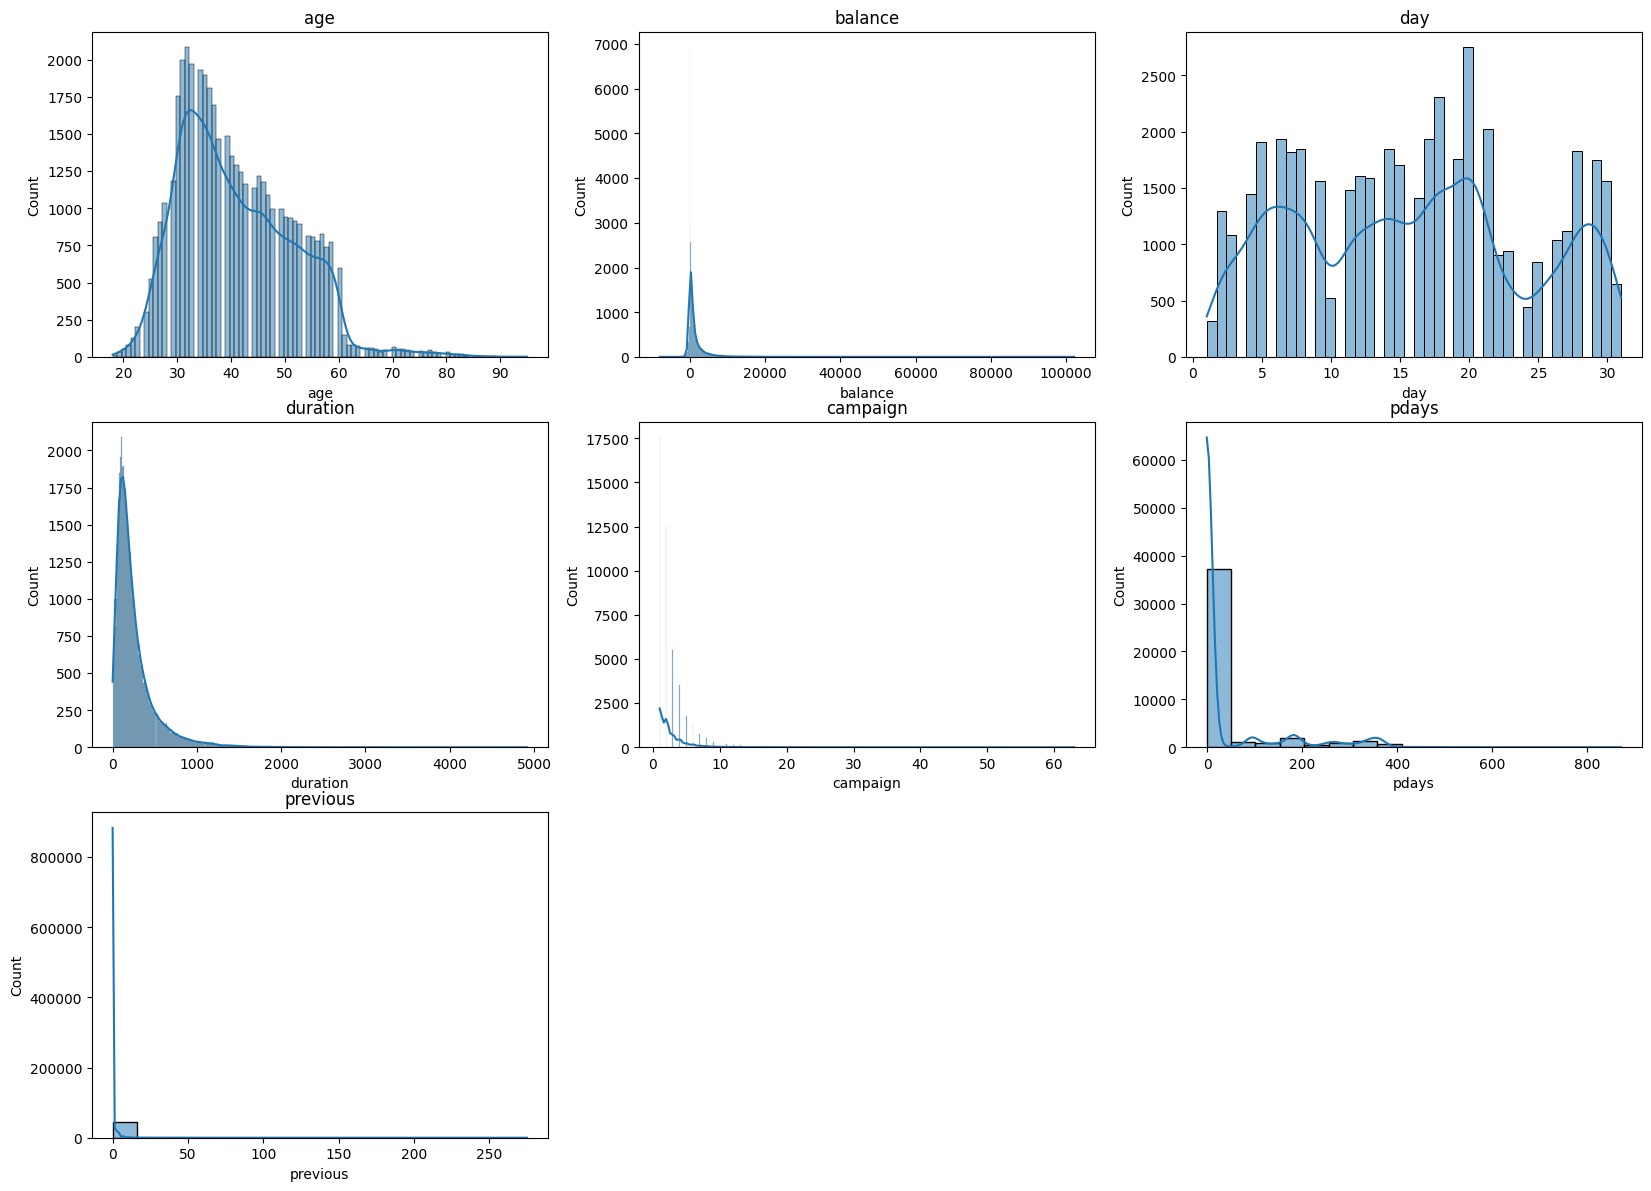

In [70]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for continous_feature in continous_features:
    ax = plt.subplot(12,3,plotnumber)
    sns.histplot(bank_full[continous_feature], kde=True, ax=ax)
    plt.xlabel(continous_feature)
    plt.title(continous_feature)
    plotnumber+=1
plt.show()

#### 1.11.1 Conclusion

It may be found here that there are regular trends amongst the menioned tables, regard the following points:

- A majoirity of the persons in the CSV file are between 30~35 years of age
- Most persons have a balance of around 0
- Age, Balance, Duration, Campaign, Pdays and previous are skewed to the left hence creating a bias for the given data frames
- 

#### 1.12 Finding Relationship between Continous numerical Features and Labels

age:
  1st Quartile (Q1): 33.0
  2nd Quartile (Median, Q2): 39.0
  3rd Quartile (Q3): 48.0
balance:
  1st Quartile (Q1): 72.0
  2nd Quartile (Median, Q2): 448.0
  3rd Quartile (Q3): 1428.0
day:
  1st Quartile (Q1): 8.0
  2nd Quartile (Median, Q2): 16.0
  3rd Quartile (Q3): 21.0
duration:
  1st Quartile (Q1): 103.0
  2nd Quartile (Median, Q2): 180.0
  3rd Quartile (Q3): 319.0
campaign:
  1st Quartile (Q1): 1.0
  2nd Quartile (Median, Q2): 2.0
  3rd Quartile (Q3): 3.0
pdays:
  1st Quartile (Q1): -1.0
  2nd Quartile (Median, Q2): -1.0
  3rd Quartile (Q3): -1.0
previous:
  1st Quartile (Q1): 0.0
  2nd Quartile (Median, Q2): 0.0
  3rd Quartile (Q3): 0.0


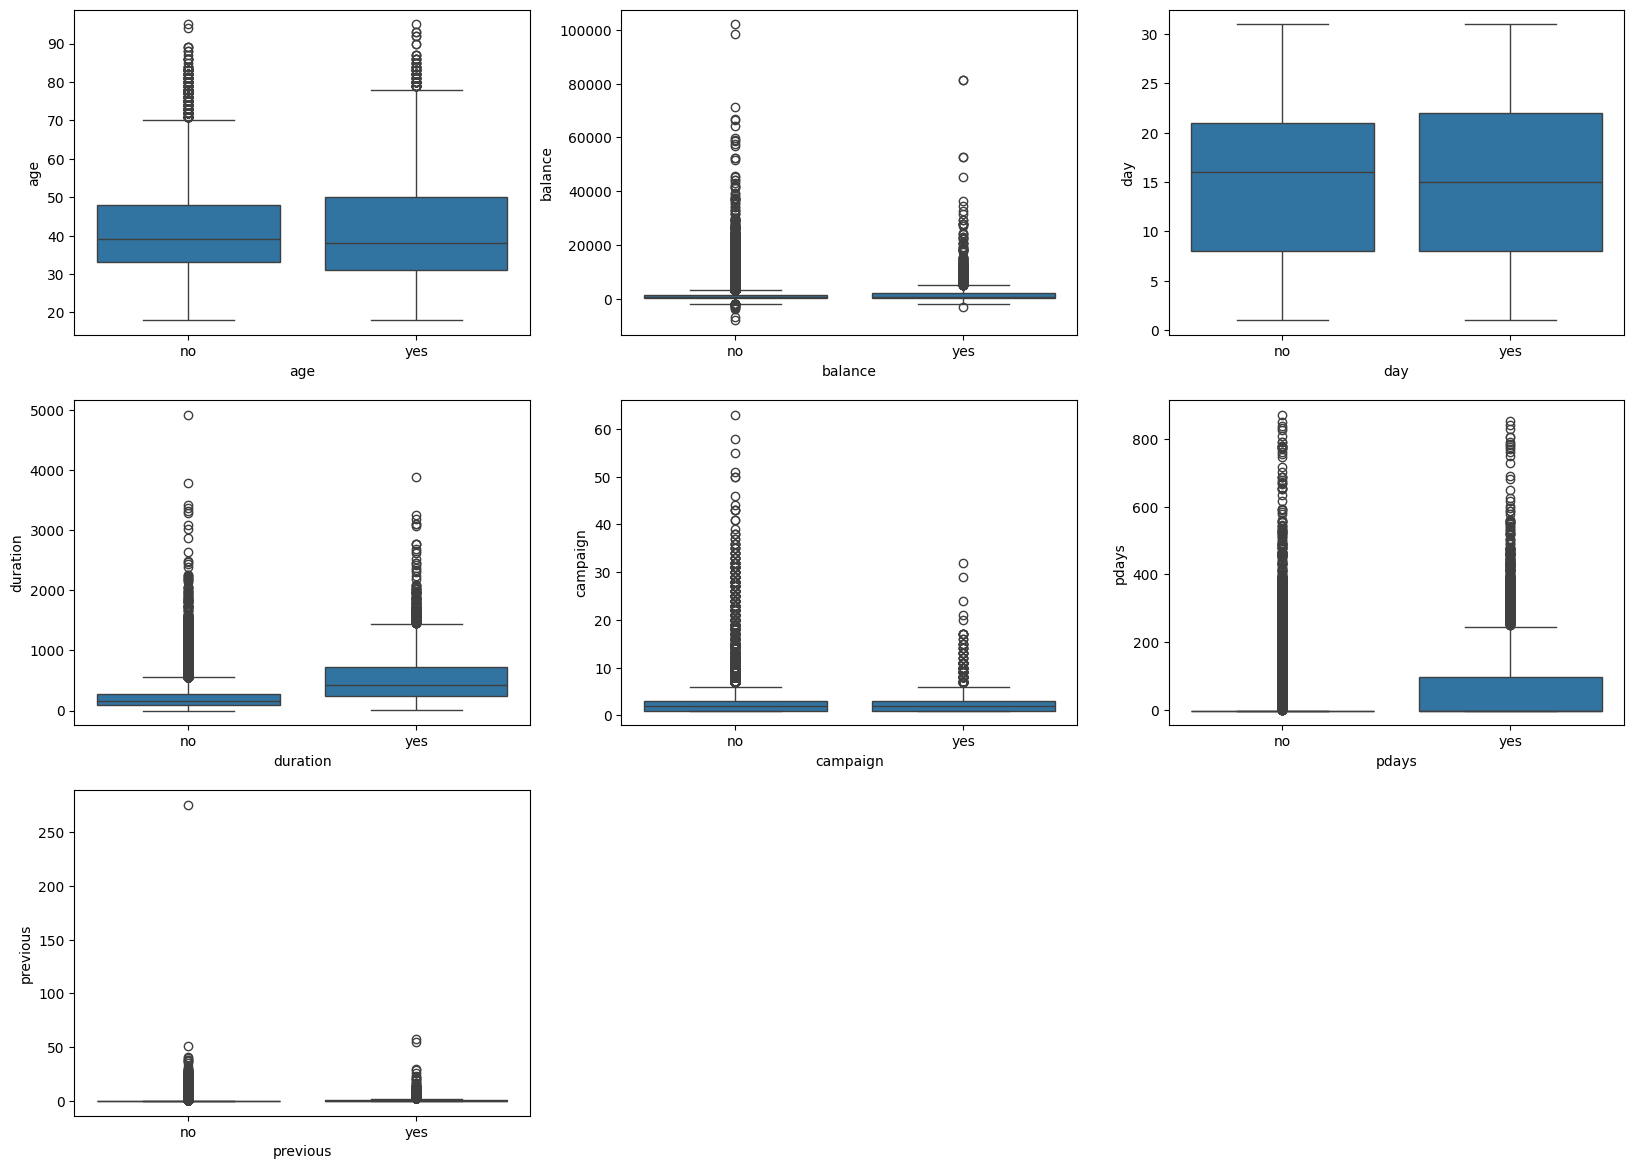

In [73]:
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for continous_feature in continous_features:
    Q1 = bank_full[continous_feature].quantile(0.25)
    Q2 = bank_full[continous_feature].quantile(0.5)
    Q3 = bank_full[continous_feature].quantile(0.75)
    print(f"{continous_feature}:")
    print(f"  1st Quartile (Q1): {Q1}")
    print(f"  2nd Quartile (Median, Q2): {Q2}")
    print(f"  3rd Quartile (Q3): {Q3}")
    ax = plt.subplot(12,3,plotnumber)
    sns.boxplot(x='y', y=bank_full[continous_feature], data=bank_full)
    plt.xlabel(continous_feature)
    plotnumber+=1
plt.show()    

#### 1.12.1 Summary

In terms of what can be derived from the provided boxplot diagrams it may be seen that:

- People within the age of 33~48 have a tendency of saying yes to making a deposit while most persons their age interact within the system
- People with a balance between 72~1428 tend to say yes to making a deposit
- People tend to make a decision on the 8th to 21st days of the month (a majority of which made the choice of saying yes to make a deposit within the given days)
- The duration lasts between 103~319 mins. The majority that votes yes on making a deposits is composed of longer durations
	- In other words, people with longer durations tend to show interests
	- Hence leading to the conclusion that longer durations affect the persons interest in making a decision
- People with more pdays tend to show more interest in making a decision on making a deposit

#### 1.13 Finding Outliers in the numerical features

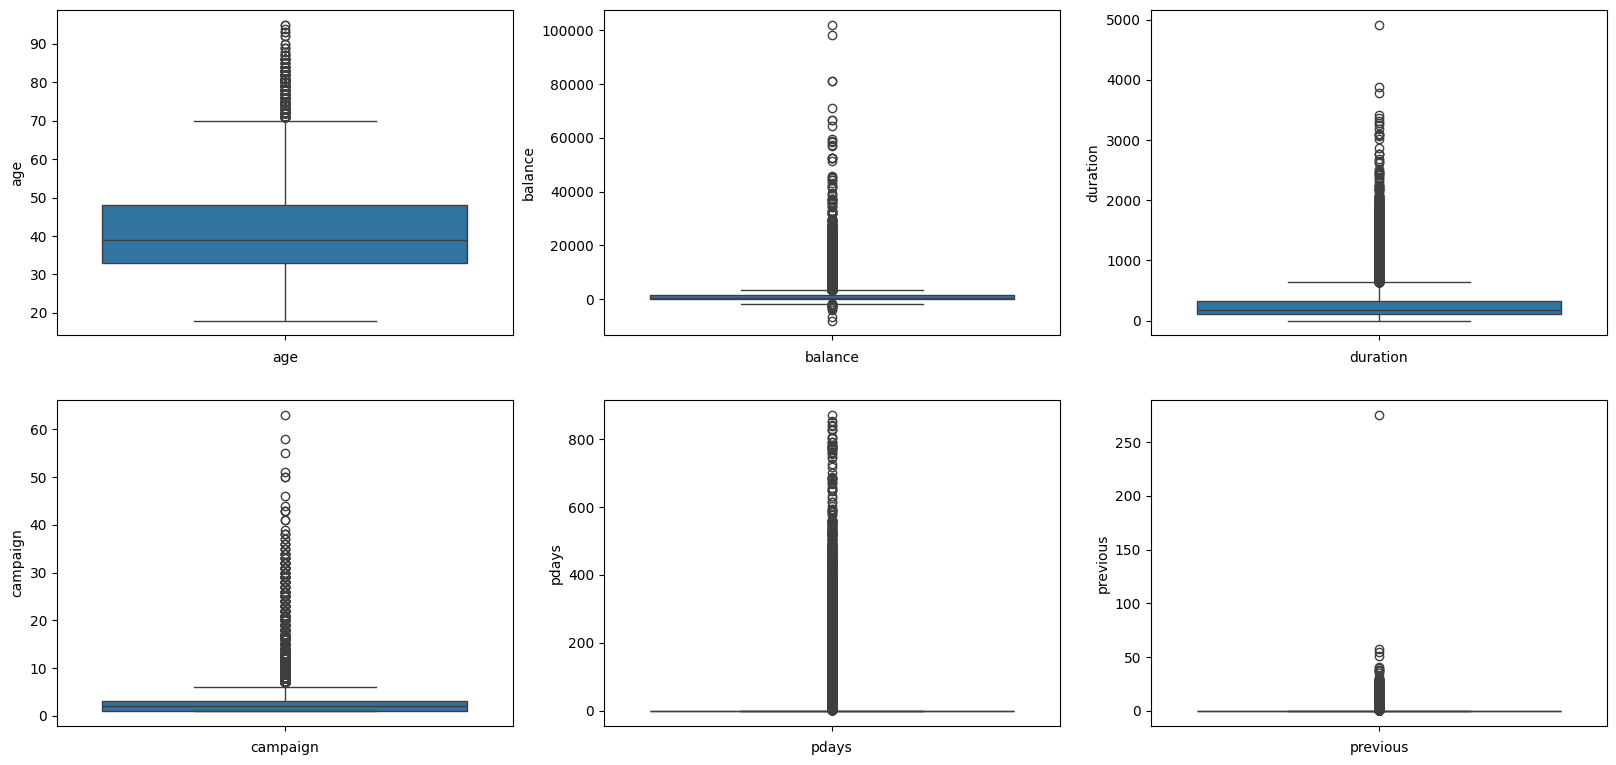

In [78]:
# Lists out the features with outliers
plt.figure(figsize=(20,60), facecolor='white')
plotnumber = 1
for numerical_feature in numerical_features:
    Q1 = bank_full[numerical_feature].quantile(0.25)
    Q3 = bank_full[numerical_feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = bank_full[(bank_full[numerical_feature] < lower_bound) | (bank_full[numerical_feature] > upper_bound)]
    if not outliers.empty:
        ax = plt.subplot(12,3,plotnumber)
        sns.boxplot(bank_full[numerical_feature])
        plt.xlabel(numerical_feature)
        plotnumber+=1
plt.show()

In [ ]:
# Function to remove outliers using IQR (Inter Quartile Range)
def remove_outliers(df, numerical_features):
    Q1 = df[numerical_features].quantile(0.25)
    Q3 = df[numerical_features].quantile(0.75)
    IQR = Q3 - Q1
    df_out = df[~((df[numerical_features] < (Q1 - 1.5 * IQR)) | (df[numerical_features] > (Q3 + 1.5 * IQR))).any(axis=1)]
    return df_out

# Remove outliers from the numerical features
bank_full_no_outliers = remove_outliers(bank_full, [feature for feature in numerical_features if feature != 'y'])# Exclude the label 

# Convert the cleaned dataframe to a 2D array with headers
data_2d_array = [numerical_features] + bank_full_no_outliers[numerical_features].values.tolist()

# Print the 2D array
for row in data_2d_array:
    print(row)

['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']
[58, 2143, 5, 261, 1, -1, 0]
[44, 29, 5, 151, 1, -1, 0]
[33, 2, 5, 76, 1, -1, 0]
[47, 1506, 5, 92, 1, -1, 0]
[33, 1, 5, 198, 1, -1, 0]
[35, 231, 5, 139, 1, -1, 0]
[28, 447, 5, 217, 1, -1, 0]
[42, 2, 5, 380, 1, -1, 0]
[58, 121, 5, 50, 1, -1, 0]
[43, 593, 5, 55, 1, -1, 0]
[41, 270, 5, 222, 1, -1, 0]
[29, 390, 5, 137, 1, -1, 0]
[53, 6, 5, 517, 1, -1, 0]
[58, 71, 5, 71, 1, -1, 0]
[57, 162, 5, 174, 1, -1, 0]
[51, 229, 5, 353, 1, -1, 0]
[45, 13, 5, 98, 1, -1, 0]
[57, 52, 5, 38, 1, -1, 0]
[60, 60, 5, 219, 1, -1, 0]
[33, 0, 5, 54, 1, -1, 0]
[28, 723, 5, 262, 1, -1, 0]
[56, 779, 5, 164, 1, -1, 0]
[32, 23, 5, 160, 1, -1, 0]
[25, 50, 5, 342, 1, -1, 0]
[40, 0, 5, 181, 1, -1, 0]
[44, -372, 5, 172, 1, -1, 0]
[39, 255, 5, 296, 1, -1, 0]
[52, 113, 5, 127, 1, -1, 0]
[46, -246, 5, 255, 2, -1, 0]
[36, 265, 5, 348, 1, -1, 0]
[57, 839, 5, 225, 1, -1, 0]
[49, 378, 5, 230, 1, -1, 0]
[60, 39, 5, 208, 1, -1, 0]
[59, 0, 5, 226, 1, -1, 0]
[57

#### 1.14 Exploring the correlation between numerical features

<Axes: >

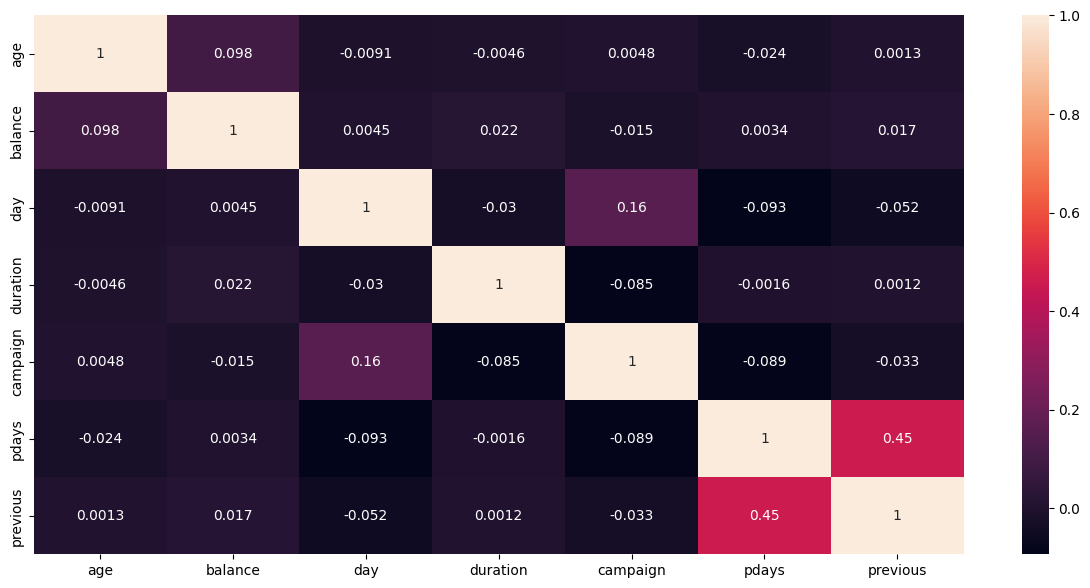

In [84]:
cor_mat = bank_full[numerical_features].corr()# setting the correlation matrix
fig = plt.figure(figsize=(15,7))# Initiating the size
sns.heatmap(cor_mat,annot=(True))# Plotting the heatmap based on the given correlation matrix

#### 1.14.1 Findings

- It may be seen that in the given heatmap, there are no features that have any notable correlations to each other 
- However there are a few norable relations (with low values):
    - Balance has a vague correlation to age
    - Campaign has a vague correlation to day 
- It may however be concluded that there are no notable correlations

#### 1.15 Check to see if the provided data set is balanced/not-based on target values in classification

Here we can check to see if the provided data set is balanced and maintained such that there may be no biases in the classification process of the model

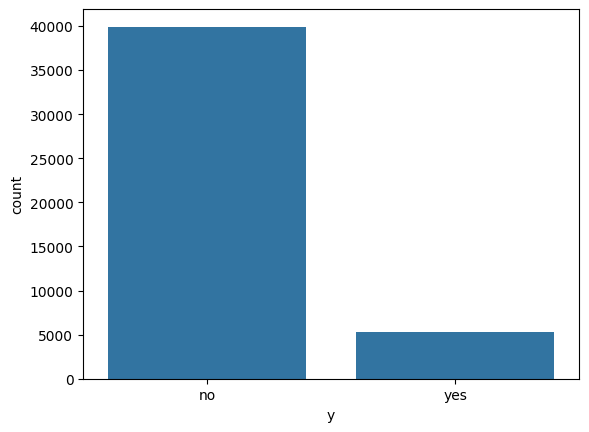

In [ ]:
sns.countplot(x='y',data=bank_full)
plt.show()# Lists out the total output of how many persons made a deposit and didnt

In [86]:
bank_full['y'].groupby(bank_full['y']).count()# prints out all the yes/no values

y
no     39922
yes     5289
Name: y, dtype: int64

# Feature Engineering